In [45]:
# 필요한 라이브러리 import

import platform
import folium
import math
import geopandas 
from tqdm import tqdm 
from shapely import wkt
from shapely.geometry import Point, Polygon, LineString

import numpy as np
import pandas as pd

# 컬럼 전체 확인 가능하도록 출력 범위 설정
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


import geopandas as gpd

#시각화 모듈
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns


# 한글 글자 깨짐 방지
plt.rcParams["font.family"] = 'Nanum Gothic'
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')


# 불필요한 경고 표시 생략

#import warnings
#warnings.filterwarnings(action = 'ignore')

#  1. Correlation plot

In [46]:
#full_table = pd.read_csv('full_table_pt1.csv')

In [47]:
full_table = gpd.read_file('full_table_pt1.geojson')

In [48]:
full_table.columns

Index(['index', 'gid', 'acci_cnt', '보행신호등', '차량신호등', '안전지대', '횡단보도', '도로속도', '정차금지대', '교통안전표지', 'CCTV', '총인구', '고령인구', '노동가능인구', '유소년인구', '교통노드', '건물면적', '차량등록대수', '중앙분리대', '전체_추정교통량', '승용차_추정교통량', '버스_추정교통량', '화물차_추정교통량', '혼잡빈도강도', '혼잡시간강도', 'geometry'], dtype='object')

In [49]:
full_table = full_table[['gid','geometry' ,'acci_cnt', '보행신호등', '차량신호등', '안전지대', '횡단보도', '도로속도',
                         '정차금지대', '교통안전표지', 'CCTV', '총인구', '고령인구', '노동가능인구', '유소년인구',
                         '교통노드', '건물면적', '차량등록대수', '중앙분리대','전체_추정교통량', '승용차_추정교통량', '버스_추정교통량', 
                         '화물차_추정교통량', '혼잡빈도강도', '혼잡시간강도']]

In [50]:
full_table.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 12179 entries, 0 to 12178
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   gid        12179 non-null  object  
 1   geometry   12179 non-null  geometry
 2   acci_cnt   12179 non-null  int64   
 3   보행신호등      12179 non-null  int64   
 4   차량신호등      12179 non-null  int64   
 5   안전지대       12179 non-null  int64   
 6   횡단보도       12179 non-null  int64   
 7   도로속도       12179 non-null  int64   
 8   정차금지대      12179 non-null  int64   
 9   교통안전표지     12179 non-null  int64   
 10  CCTV       12179 non-null  int64   
 11  총인구        12179 non-null  int64   
 12  고령인구       12179 non-null  int64   
 13  노동가능인구     12179 non-null  int64   
 14  유소년인구      12179 non-null  int64   
 15  교통노드       12179 non-null  int64   
 16  건물면적       12179 non-null  float64 
 17  차량등록대수     12179 non-null  int64   
 18  중앙분리대      12179 non-null  int64   
 19  전체_추정교통량   12179 

In [51]:
full_table

,gid,geometry,acci_cnt,보행신호등,차량신호등,안전지대,횡단보도,도로속도,정차금지대,교통안전표지,CCTV,총인구,고령인구,노동가능인구,유소년인구,교통노드,건물면적,차량등록대수,중앙분리대,전체_추정교통량,승용차_추정교통량,버스_추정교통량,화물차_추정교통량,혼잡빈도강도,혼잡시간강도
0,다바866110,"MULTIPOLYGON (((127.35076 36.29622, 127.35076 ...",0,0,0,0,0,0,0,0,0,13,13,10,0,0,146.5900,4,0,8283.0000,6998.5000,91.5000,1192.5000,0.3500,2.7400
1,다바823157,"MULTIPOLYGON (((127.30277 36.33853, 127.30276 ...",0,3,4,2,3,0,0,14,0,267,267,198,44,1,5944.9800,0,0,1181.6250,1021.8750,10.1250,149.8750,21.1575,38.4712
2,다바928260,"MULTIPOLYGON (((127.41967 36.43152, 127.41967 ...",0,6,5,0,4,3,0,14,0,78,78,65,8,2,1487.4900,40,0,3783.7500,3263.5000,32.5000,488.1250,48.0125,70.8025
3,다바931203,"MULTIPOLYGON (((127.42307 36.38013, 127.42307 ...",2,1,3,1,1,2,0,5,0,0,0,0,0,0,1291.1900,409,0,11596.0000,9698.0000,132.0000,1765.5000,97.3600,98.5000
4,다바836109,"MULTIPOLYGON (((127.31735 36.29527, 127.31735 ...",0,2,0,0,2,0,0,6,0,396,396,339,29,0,12875.5200,0,0,678.8750,610.0000,5.5000,63.5000,48.4675,65.4450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12174,다바911108,"MULTIPOLYGON (((127.40088 36.29447, 127.40088 ...",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0,0,286.5000,268.5000,0.5000,17.5000,77.6700,94.8600
12175,다바968288,"MULTIPOLYGON (((127.46429 36.45678, 127.46429 ...",0,0,0,0,0,0,0,2,0,0,0,0,0,0,0.0000,0,0,2515.2500,2232.5000,19.7500,262.7500,1.2375,3.8250
12176,다바906266,"MULTIPOLYGON (((127.39512 36.43691, 127.39512 ...",0,0,0,0,0,0,0,3,0,0,0,0,0,0,0.0000,0,0,16135.2500,12762.7500,214.0000,3159.0000,1.6350,5.1375
12177,다바906193,"MULTIPOLYGON (((127.39521 36.37110, 127.39521 ...",0,0,0,0,0,0,0,2,1,0,0,0,0,0,0.0000,0,0,14414.5000,11115.5000,274.0000,3025.0000,31.4150,48.2950


In [52]:
## correlation plot 
def cor(df):

    # plot size 설정 
    f, ax = plt.subplots(figsize=(20,20))

    # upper matrix
    matrix = np.triu(df.corr())

    # palette 
    colormap = sns.diverging_palette(220, 10, as_cmap=True)

    sns.heatmap(df.corr(),
                    annot=True,  #실제값 표시
                    annot_kws={"size": 7}, #실제값 크기
                    fmt ='.1g', #실제값 소수점 수 지정
                    linewidths=.5, # 경계면 실선으로 바꾸기
                    center = 0, vmin=-1, vmax=1, #컬러바 범위 -1 ~ 1
                    cmap = colormap, 
                    cbar = True, # 컬러바 표시 여부
                    cbar_kws= {"shrink": 0.5} ,  # 0.5 : 컬러바 크기 반으로 줄임
                    square = True, 
                    mask = matrix) # 표시하지 않을 부분 지정
    plt.show()
    #plt.savefig('correlation_plot.png')

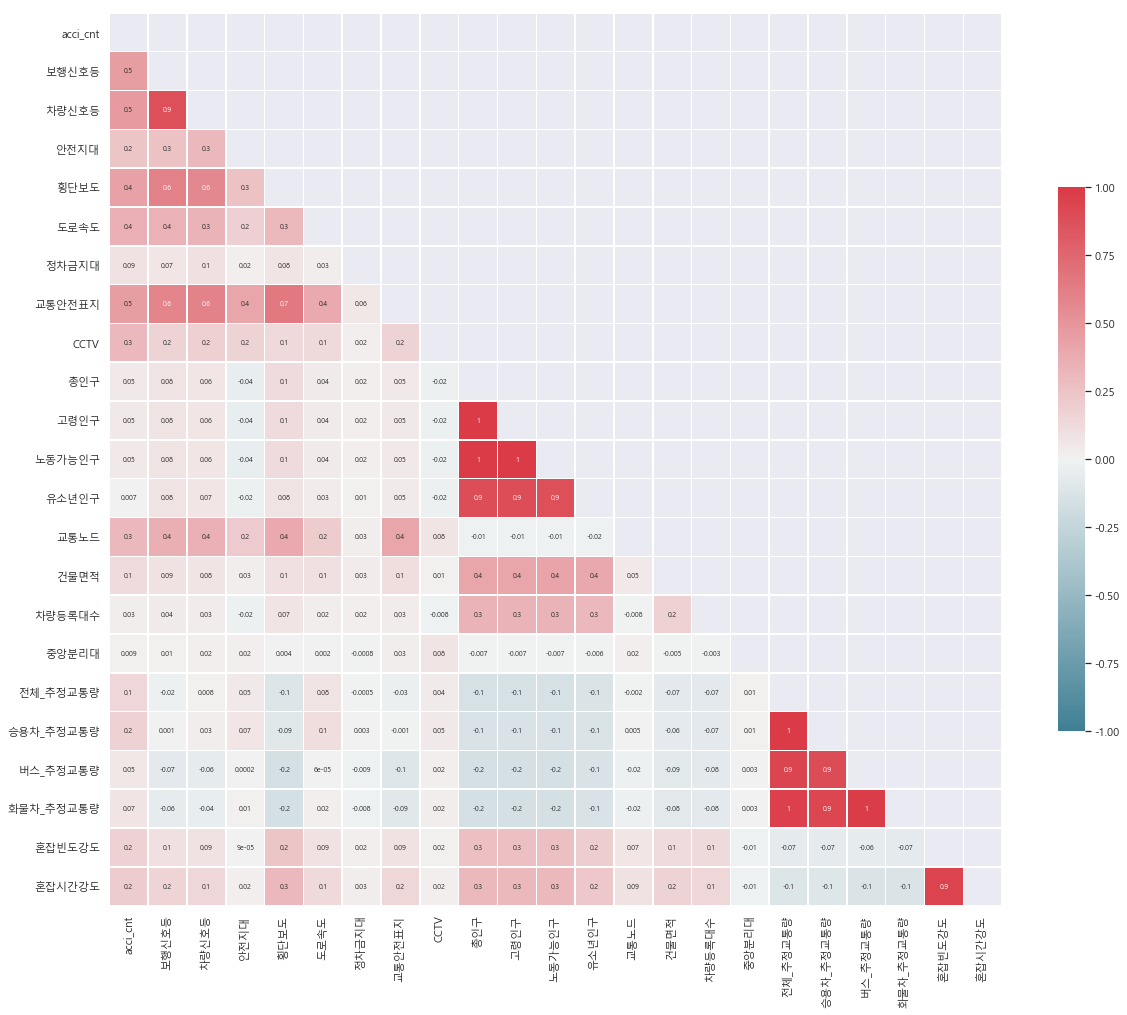

In [53]:
cor(full_table)

# 2. VIF 지수 확인 (10이상 feature에서 제거)

In [54]:
#다중공선성 체크

def vif(X):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    # 피처마다의 VIF 계수를 출력합니다.(소수점 4째자리까지만 출력)
    pd.options.display.float_format = '{:.4f}'.format

    vif = pd.DataFrame()
    vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['features'] = X.columns
    print(vif)
    print('\n')
    return vif[vif['VIF Factor']>10]

In [55]:
trial1 = full_table.loc[:,'acci_cnt':'혼잡시간강도']
#y = full_table.loc[:,'acci_cnt']

In [56]:
vif(trial1)

/opt/app-root/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


        VIF Factor   features
0           1.9278   acci_cnt
1           5.5386      보행신호등
2           5.5882      차량신호등
3           1.3771       안전지대
4           3.1915       횡단보도
5           1.5431       도로속도
6           1.0201      정차금지대
7           3.6872     교통안전표지
8           1.1365       CCTV
9              inf        총인구
10             inf       고령인구
11        129.9663     노동가능인구
12          6.1127      유소년인구
13          1.5300       교통노드
14          1.3895       건물면적
15          1.1910     차량등록대수
16          1.0086      중앙분리대
17 1032085052.6912   전체_추정교통량
18  559982292.2646  승용차_추정교통량
19     610230.1294   버스_추정교통량
20   65439650.7469  화물차_추정교통량
21         27.3985     혼잡빈도강도
22         32.8647     혼잡시간강도




,VIF Factor,features
9,inf,총인구
10,inf,고령인구
11,129.9663,노동가능인구
17,1032085052.6912,전체_추정교통량
18,559982292.2646,승용차_추정교통량
19,610230.1294,버스_추정교통량
20,65439650.7469,화물차_추정교통량
21,27.3985,혼잡빈도강도
22,32.8647,혼잡시간강도


교통 추정량은 중요데이터 - 타 교통량 데이터를 포괄하는 전체 교통 추정량만 사용하고 나머지 제외

In [57]:
trial2 = full_table[['acci_cnt','보행신호등', '차량신호등', '안전지대', '횡단보도', '도로속도',
                         '정차금지대', '교통안전표지', 'CCTV', '총인구', '고령인구','노동가능인구', '유소년인구',
                         '교통노드', '건물면적', '차량등록대수', '전체_추정교통량','중앙분리대', '혼잡빈도강도', '혼잡시간강도']]

In [58]:
vif(trial2)

/opt/app-root/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


    VIF Factor  features
0       1.9041  acci_cnt
1       5.5201     보행신호등
2       5.5775     차량신호등
3       1.3731      안전지대
4       3.1898      횡단보도
5       1.5209      도로속도
6       1.0201     정차금지대
7       3.6274    교통안전표지
8       1.1355      CCTV
9          inf       총인구
10         inf      고령인구
11    129.8423    노동가능인구
12      6.0837     유소년인구
13      1.5236      교통노드
14      1.3879      건물면적
15      1.1909    차량등록대수
16      1.5473  전체_추정교통량
17      1.0080     중앙분리대
18     26.2193    혼잡빈도강도
19     30.6401    혼잡시간강도




,VIF Factor,features
9,inf,총인구
10,inf,고령인구
11,129.8423,노동가능인구
18,26.2193,혼잡빈도강도
19,30.6401,혼잡시간강도


타 인구 데이터를 포괄하는 총인구만 사용 - 나머지 제외

In [59]:
trial3 = full_table[['acci_cnt','보행신호등', '차량신호등', '안전지대', '횡단보도', '도로속도',
                         '정차금지대', '교통안전표지', 'CCTV', '총인구','교통노드', '건물면적',
                     '차량등록대수', '전체_추정교통량','중앙분리대', '혼잡시간강도','혼잡빈도강도']]

In [60]:
vif(trial3)

    VIF Factor  features
0       1.8825  acci_cnt
1       5.5127     보행신호등
2       5.5731     차량신호등
3       1.3712      안전지대
4       3.1784      횡단보도
5       1.5208      도로속도
6       1.0200     정차금지대
7       3.6247    교통안전표지
8       1.1350      CCTV
9       1.7605       총인구
10      1.5202      교통노드
11      1.3757      건물면적
12      1.1884    차량등록대수
13      1.5465  전체_추정교통량
14      1.0080     중앙분리대
15     30.5379    혼잡시간강도
16     26.2022    혼잡빈도강도




,VIF Factor,features
15,30.5379,혼잡시간강도
16,26.2022,혼잡빈도강도


혼잡시간강도만 제외하고 재시도

In [61]:
trial4 = full_table[['acci_cnt','보행신호등', '차량신호등', '안전지대', '횡단보도', '도로속도',
                         '정차금지대', '교통안전표지', 'CCTV', '총인구','교통노드', '건물면적',
                     '차량등록대수', '전체_추정교통량','중앙분리대','혼잡빈도강도']]

In [62]:
vif(trial4)

    VIF Factor  features
0       1.8795  acci_cnt
1       5.5127     보행신호등
2       5.5730     차량신호등
3       1.3712      안전지대
4       3.1619      횡단보도
5       1.5129      도로속도
6       1.0199     정차금지대
7       3.5165    교통안전표지
8       1.1338      CCTV
9       1.7329       총인구
10      1.5200      교통노드
11      1.3665      건물면적
12      1.1880    차량등록대수
13      1.4854  전체_추정교통량
14      1.0079     중앙분리대
15      2.1973    혼잡빈도강도




,VIF Factor,features


혼잡빈도강도를 제외하고 혼잡시간강도를 다시 포함시켜 결과치 비교

In [63]:
trial5 = full_table[['acci_cnt','보행신호등', '차량신호등', '안전지대', '횡단보도', '도로속도',
                         '정차금지대', '교통안전표지', 'CCTV', '총인구','교통노드', '건물면적',
                     '차량등록대수', '전체_추정교통량','중앙분리대','혼잡시간강도']]

In [64]:
vif(trial5)

    VIF Factor  features
0       1.8778  acci_cnt
1       5.5107     보행신호등
2       5.5723     차량신호등
3       1.3711      안전지대
4       3.1782      횡단보도
5       1.5162      도로속도
6       1.0199     정차금지대
7       3.5539    교통안전표지
8       1.1345      CCTV
9       1.7589       총인구
10      1.5202      교통노드
11      1.3689      건물면적
12      1.1884    차량등록대수
13      1.5366  전체_추정교통량
14      1.0078     중앙분리대
15      2.5608    혼잡시간강도




,VIF Factor,features


상대적으로 수치가 안정적인 혼잡빈도강도를 사용하고 혼잡시간 강도는 제외

# 3. final_table 만들기

In [87]:
final_table = full_table.drop(['고령인구','노동가능인구', '유소년인구', '승용차_추정교통량', '버스_추정교통량', 
                         '화물차_추정교통량','혼잡빈도강도'], axis=1)

In [88]:
final_table

,gid,geometry,acci_cnt,보행신호등,차량신호등,안전지대,횡단보도,도로속도,정차금지대,교통안전표지,CCTV,총인구,교통노드,건물면적,차량등록대수,중앙분리대,전체_추정교통량,혼잡시간강도
0,다바866110,"MULTIPOLYGON (((127.35076 36.29622, 127.35076 ...",0,0,0,0,0,0,0,0,0,13,0,146.5900,4,0,8283.0000,2.7400
1,다바823157,"MULTIPOLYGON (((127.30277 36.33853, 127.30276 ...",0,3,4,2,3,0,0,14,0,267,1,5944.9800,0,0,1181.6250,38.4712
2,다바928260,"MULTIPOLYGON (((127.41967 36.43152, 127.41967 ...",0,6,5,0,4,3,0,14,0,78,2,1487.4900,40,0,3783.7500,70.8025
3,다바931203,"MULTIPOLYGON (((127.42307 36.38013, 127.42307 ...",2,1,3,1,1,2,0,5,0,0,0,1291.1900,409,0,11596.0000,98.5000
4,다바836109,"MULTIPOLYGON (((127.31735 36.29527, 127.31735 ...",0,2,0,0,2,0,0,6,0,396,0,12875.5200,0,0,678.8750,65.4450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12174,다바911108,"MULTIPOLYGON (((127.40088 36.29447, 127.40088 ...",1,0,0,0,0,0,0,0,0,0,0,0.0000,0,0,286.5000,94.8600
12175,다바968288,"MULTIPOLYGON (((127.46429 36.45678, 127.46429 ...",0,0,0,0,0,0,0,2,0,0,0,0.0000,0,0,2515.2500,3.8250
12176,다바906266,"MULTIPOLYGON (((127.39512 36.43691, 127.39512 ...",0,0,0,0,0,0,0,3,0,0,0,0.0000,0,0,16135.2500,5.1375
12177,다바906193,"MULTIPOLYGON (((127.39521 36.37110, 127.39521 ...",0,0,0,0,0,0,0,2,1,0,0,0.0000,0,0,14414.5000,48.2950


In [89]:
final_table = gpd.GeoDataFrame(final_table)

In [90]:
final_table.to_file('final_table.geojson', driver="GeoJSON",index=False)

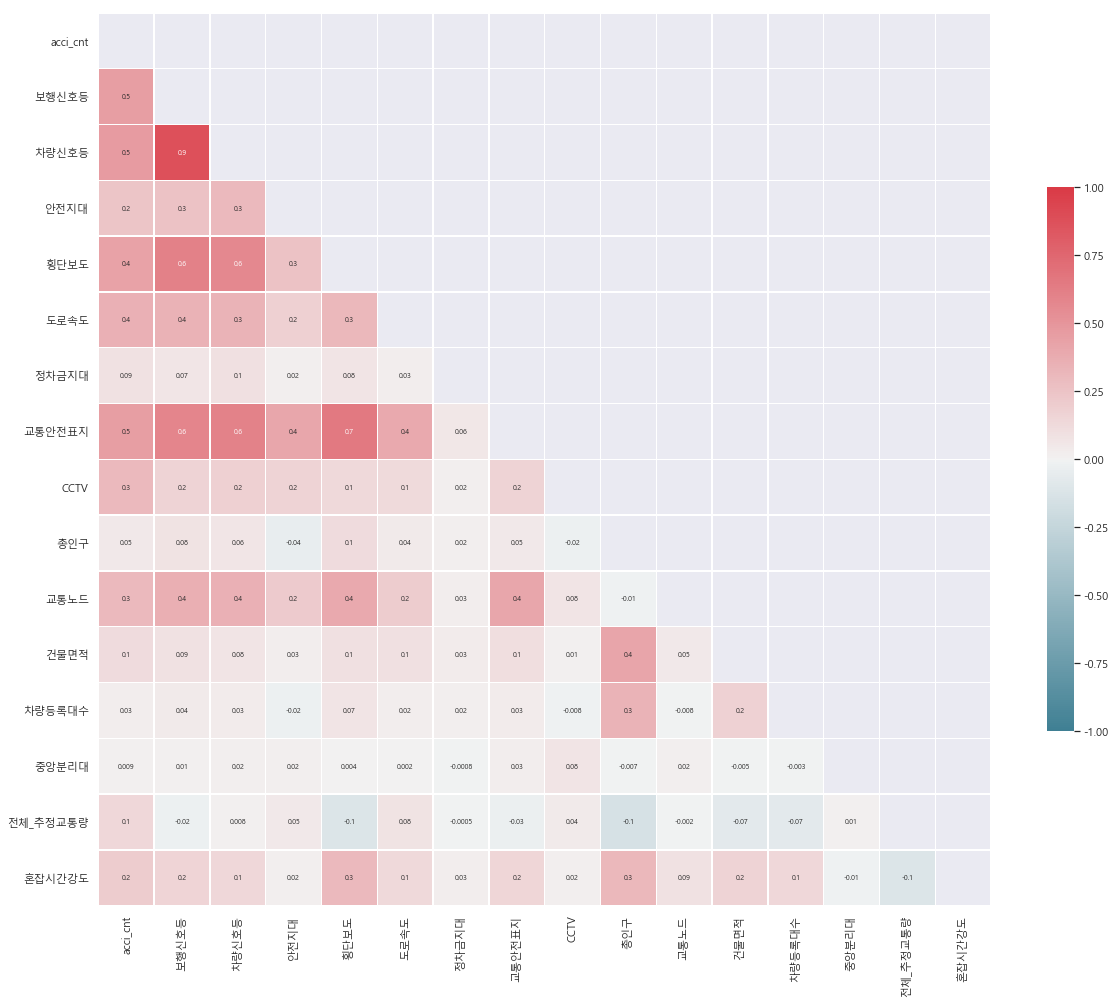

In [91]:
cor(final_table)

차량 신호등 - 보행신호등이 상관관계가 높으나 vif 수치가 이상치를 벗어나지 않고, 분석에 유의미한 데이터라 판단되어 그대로 사용

# 최종데이터 만들기

In [92]:
df1 = pd.read_csv('accident_data_final.csv')
df2 = gpd.read_file('final_table.geojson')

In [93]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5939 entries, 0 to 5938
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gid          5939 non-null   object 
 1   사망자수         5939 non-null   int64  
 2   중상자수         5939 non-null   int64  
 3   경상자수         5939 non-null   int64  
 4   부상신고자수       5939 non-null   int64  
 5   일강수량(mm)     5939 non-null   float64
 6   일 최심적설(cm)   5939 non-null   float64
 7   안개 계속시간(hr)  5939 non-null   float64
dtypes: float64(3), int64(4), object(1)
memory usage: 371.3+ KB


In [94]:
df2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 12179 entries, 0 to 12178
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   gid       12179 non-null  object  
 1   acci_cnt  12179 non-null  int64   
 2   보행신호등     12179 non-null  int64   
 3   차량신호등     12179 non-null  int64   
 4   안전지대      12179 non-null  int64   
 5   횡단보도      12179 non-null  int64   
 6   도로속도      12179 non-null  int64   
 7   정차금지대     12179 non-null  int64   
 8   교통안전표지    12179 non-null  int64   
 9   CCTV      12179 non-null  int64   
 10  총인구       12179 non-null  int64   
 11  교통노드      12179 non-null  int64   
 12  건물면적      12179 non-null  float64 
 13  차량등록대수    12179 non-null  int64   
 14  중앙분리대     12179 non-null  int64   
 15  전체_추정교통량  12179 non-null  float64 
 16  혼잡시간강도    12179 non-null  float64 
 17  geometry  12179 non-null  geometry
dtypes: float64(3), geometry(1), int64(13), object(1)
memory usage: 1.7+ MB


In [96]:
dataset = pd.merge(df1, df2, on = 'gid', how = 'right')

print(dataset.info())
dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12179 entries, 0 to 12178
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   gid          12179 non-null  object  
 1   사망자수         4987 non-null   float64 
 2   중상자수         4987 non-null   float64 
 3   경상자수         4987 non-null   float64 
 4   부상신고자수       4987 non-null   float64 
 5   일강수량(mm)     4987 non-null   float64 
 6   일 최심적설(cm)   4987 non-null   float64 
 7   안개 계속시간(hr)  4987 non-null   float64 
 8   acci_cnt     12179 non-null  int64   
 9   보행신호등        12179 non-null  int64   
 10  차량신호등        12179 non-null  int64   
 11  안전지대         12179 non-null  int64   
 12  횡단보도         12179 non-null  int64   
 13  도로속도         12179 non-null  int64   
 14  정차금지대        12179 non-null  int64   
 15  교통안전표지       12179 non-null  int64   
 16  CCTV         12179 non-null  int64   
 17  총인구          12179 non-null  int64   
 18  교통노드         12179 non-nul

,gid,사망자수,중상자수,경상자수,부상신고자수,일강수량(mm),일 최심적설(cm),안개 계속시간(hr),acci_cnt,보행신호등,차량신호등,안전지대,횡단보도,도로속도,정차금지대,교통안전표지,CCTV,총인구,교통노드,건물면적,차량등록대수,중앙분리대,전체_추정교통량,혼잡시간강도,geometry
0,다바866110,nan,nan,nan,nan,nan,nan,nan,0,0,0,0,0,0,0,0,0,13,0,146.5900,4,0,8283.0000,2.7400,"MULTIPOLYGON (((127.35076 36.29622, 127.35076 ..."
1,다바823157,nan,nan,nan,nan,nan,nan,nan,0,3,4,2,3,0,0,14,0,267,1,5944.9800,0,0,1181.6250,38.4712,"MULTIPOLYGON (((127.30277 36.33853, 127.30276 ..."
2,다바928260,nan,nan,nan,nan,nan,nan,nan,0,6,5,0,4,3,0,14,0,78,2,1487.4900,40,0,3783.7500,70.8025,"MULTIPOLYGON (((127.41967 36.43152, 127.41967 ..."
3,다바931203,0.0000,1.0000,1.0000,0.0000,4.2000,3.3000,0.0000,2,1,3,1,1,2,0,5,0,0,0,1291.1900,409,0,11596.0000,98.5000,"MULTIPOLYGON (((127.42307 36.38013, 127.42307 ..."
4,다바836109,nan,nan,nan,nan,nan,nan,nan,0,2,0,0,2,0,0,6,0,396,0,12875.5200,0,0,678.8750,65.4450,"MULTIPOLYGON (((127.31735 36.29527, 127.31735 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12174,다바911108,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1,0,0,0,0,0,0,0,0,0,0,0.0000,0,0,286.5000,94.8600,"MULTIPOLYGON (((127.40088 36.29447, 127.40088 ..."
12175,다바968288,nan,nan,nan,nan,nan,nan,nan,0,0,0,0,0,0,0,2,0,0,0,0.0000,0,0,2515.2500,3.8250,"MULTIPOLYGON (((127.46429 36.45678, 127.46429 ..."
12176,다바906266,nan,nan,nan,nan,nan,nan,nan,0,0,0,0,0,0,0,3,0,0,0,0.0000,0,0,16135.2500,5.1375,"MULTIPOLYGON (((127.39512 36.43691, 127.39512 ..."
12177,다바906193,nan,nan,nan,nan,nan,nan,nan,0,0,0,0,0,0,0,2,1,0,0,0.0000,0,0,14414.5000,48.2950,"MULTIPOLYGON (((127.39521 36.37110, 127.39521 ..."


In [97]:
dataset = dataset.fillna(0)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12179 entries, 0 to 12178
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   gid          12179 non-null  object  
 1   사망자수         12179 non-null  float64 
 2   중상자수         12179 non-null  float64 
 3   경상자수         12179 non-null  float64 
 4   부상신고자수       12179 non-null  float64 
 5   일강수량(mm)     12179 non-null  float64 
 6   일 최심적설(cm)   12179 non-null  float64 
 7   안개 계속시간(hr)  12179 non-null  float64 
 8   acci_cnt     12179 non-null  int64   
 9   보행신호등        12179 non-null  int64   
 10  차량신호등        12179 non-null  int64   
 11  안전지대         12179 non-null  int64   
 12  횡단보도         12179 non-null  int64   
 13  도로속도         12179 non-null  int64   
 14  정차금지대        12179 non-null  int64   
 15  교통안전표지       12179 non-null  int64   
 16  CCTV         12179 non-null  int64   
 17  총인구          12179 non-null  int64   
 18  교통노드         12179 non-nul

In [98]:
dataset.columns

Index(['gid', '사망자수', '중상자수', '경상자수', '부상신고자수', '일강수량(mm)', '일 최심적설(cm)', '안개 계속시간(hr)', 'acci_cnt', '보행신호등', '차량신호등', '안전지대', '횡단보도', '도로속도', '정차금지대', '교통안전표지', 'CCTV', '총인구', '교통노드', '건물면적', '차량등록대수', '중앙분리대', '전체_추정교통량', '혼잡시간강도', 'geometry'], dtype='object')

In [99]:
dataset = dataset[['gid','geometry','acci_cnt', '사망자수', '중상자수', '경상자수', '부상신고자수', 
                           '일강수량(mm)', '일 최심적설(cm)', '안개 계속시간(hr)', '보행신호등', '차량신호등', 
                           '안전지대', '횡단보도', '도로속도', '정차금지대', '교통안전표지',
                           'CCTV', '총인구', '교통노드', '건물면적', '차량등록대수', '전체_추정교통량', '혼잡시간강도']]
dataset

,gid,geometry,acci_cnt,사망자수,중상자수,경상자수,부상신고자수,일강수량(mm),일 최심적설(cm),안개 계속시간(hr),보행신호등,차량신호등,안전지대,횡단보도,도로속도,정차금지대,교통안전표지,CCTV,총인구,교통노드,건물면적,차량등록대수,전체_추정교통량,혼잡시간강도
0,다바866110,"MULTIPOLYGON (((127.35076 36.29622, 127.35076 ...",0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0,0,0,0,0,0,0,13,0,146.5900,4,8283.0000,2.7400
1,다바823157,"MULTIPOLYGON (((127.30277 36.33853, 127.30276 ...",0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3,4,2,3,0,0,14,0,267,1,5944.9800,0,1181.6250,38.4712
2,다바928260,"MULTIPOLYGON (((127.41967 36.43152, 127.41967 ...",0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6,5,0,4,3,0,14,0,78,2,1487.4900,40,3783.7500,70.8025
3,다바931203,"MULTIPOLYGON (((127.42307 36.38013, 127.42307 ...",2,0.0000,1.0000,1.0000,0.0000,4.2000,3.3000,0.0000,1,3,1,1,2,0,5,0,0,0,1291.1900,409,11596.0000,98.5000
4,다바836109,"MULTIPOLYGON (((127.31735 36.29527, 127.31735 ...",0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2,0,0,2,0,0,6,0,396,0,12875.5200,0,678.8750,65.4450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12174,다바911108,"MULTIPOLYGON (((127.40088 36.29447, 127.40088 ...",1,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0,0,0,0,0,0,0,0,0,0.0000,0,286.5000,94.8600
12175,다바968288,"MULTIPOLYGON (((127.46429 36.45678, 127.46429 ...",0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0,0,0,0,0,2,0,0,0,0.0000,0,2515.2500,3.8250
12176,다바906266,"MULTIPOLYGON (((127.39512 36.43691, 127.39512 ...",0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0,0,0,0,0,3,0,0,0,0.0000,0,16135.2500,5.1375
12177,다바906193,"MULTIPOLYGON (((127.39521 36.37110, 127.39521 ...",0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0,0,0,0,0,2,1,0,0,0.0000,0,14414.5000,48.2950


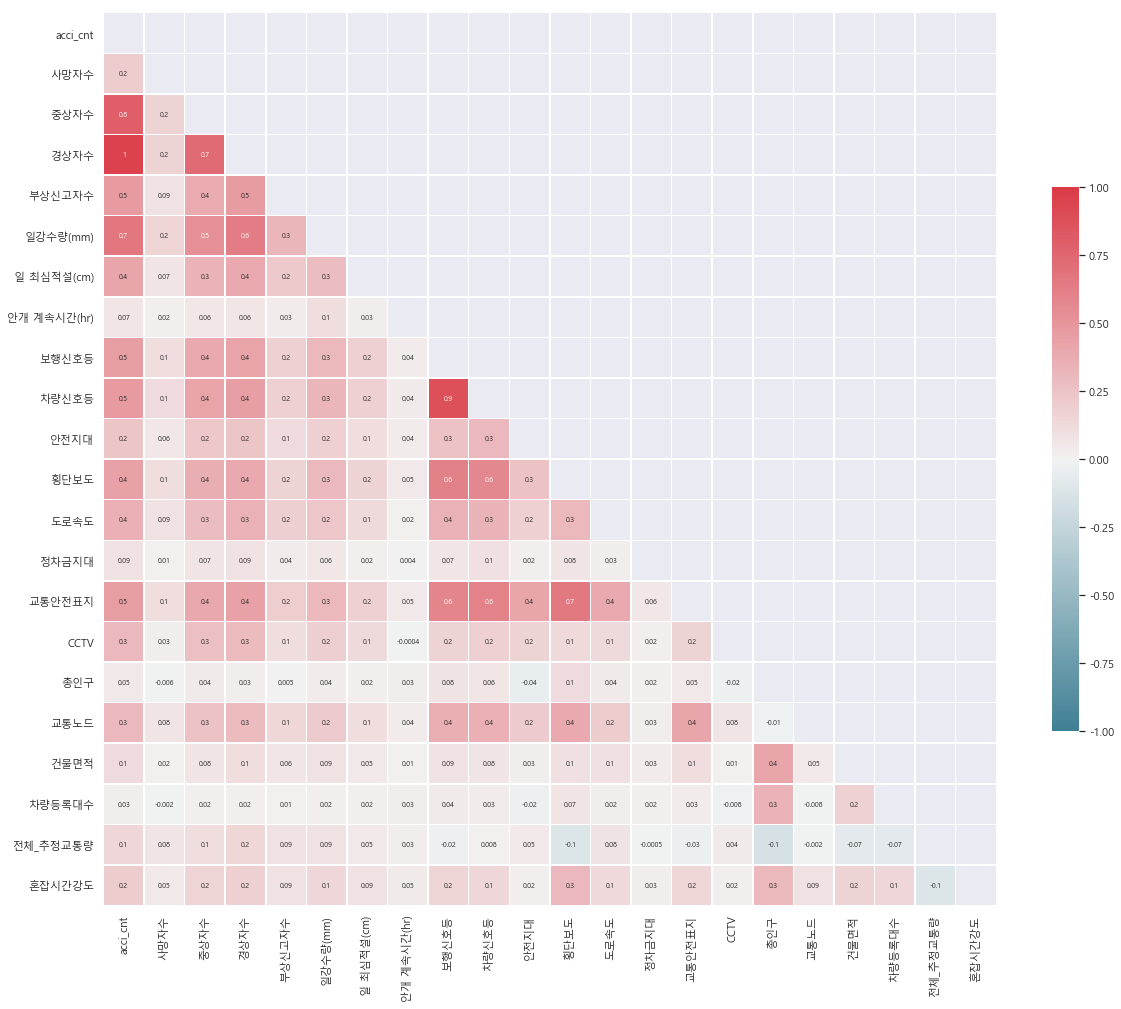

In [100]:
cor(dataset)

In [101]:
dataset.columns

Index(['gid', 'geometry', 'acci_cnt', '사망자수', '중상자수', '경상자수', '부상신고자수', '일강수량(mm)', '일 최심적설(cm)', '안개 계속시간(hr)', '보행신호등', '차량신호등', '안전지대', '횡단보도', '도로속도', '정차금지대', '교통안전표지', 'CCTV', '총인구', '교통노드', '건물면적', '차량등록대수', '전체_추정교통량', '혼잡시간강도'], dtype='object')

In [103]:
trial7 = dataset[['acci_cnt', '사망자수', '중상자수', '경상자수', '부상신고자수', '일강수량(mm)', 
                      '일 최심적설(cm)', '안개 계속시간(hr)', 
                      '보행신호등', '차량신호등', '안전지대', '횡단보도', '도로속도', '정차금지대', 
                      '교통안전표지', 'CCTV', '총인구', '교통노드', '건물면적', '차량등록대수', 
                      '전체_추정교통량', '혼잡시간강도']]

In [104]:
vif(trial7)

    VIF Factor     features
0      21.7166     acci_cnt
1       1.0770         사망자수
2       3.2838         중상자수
3      14.7564         경상자수
4       1.3543       부상신고자수
5       1.9652     일강수량(mm)
6       1.2381   일 최심적설(cm)
7       1.0284  안개 계속시간(hr)
8       5.5242        보행신호등
9       5.6088        차량신호등
10      1.3790         안전지대
11      3.1996         횡단보도
12      1.5205         도로속도
13      1.0206        정차금지대
14      3.5530       교통안전표지
15      1.1341         CCTV
16      1.7627          총인구
17      1.5216         교통노드
18      1.3719         건물면적
19      1.1892       차량등록대수
20      1.5434     전체_추정교통량
21      2.5728       혼잡시간강도




,VIF Factor,features
0,21.7166,acci_cnt
3,14.7564,경상자수


# 최종 VIF 결과

In [107]:
trial8= dataset[['acci_cnt', '사망자수', '중상자수', '부상신고자수', '일강수량(mm)', 
                      '일 최심적설(cm)', '안개 계속시간(hr)', 
                      '보행신호등', '차량신호등', '안전지대', '횡단보도', '도로속도', '정차금지대', 
                      '교통안전표지', 'CCTV', '총인구', '교통노드', '건물면적', '차량등록대수', 
                      '전체_추정교통량', '혼잡시간강도']]

In [108]:
vif(trial8)

    VIF Factor     features
0       5.3185     acci_cnt
1       1.0661         사망자수
2       3.1418         중상자수
3       1.3533       부상신고자수
4       1.9651     일강수량(mm)
5       1.2381   일 최심적설(cm)
6       1.0284  안개 계속시간(hr)
7       5.5234        보행신호등
8       5.6077        차량신호등
9       1.3742         안전지대
10      3.1835         횡단보도
11      1.5194         도로속도
12      1.0205        정차금지대
13      3.5530       교통안전표지
14      1.1339         CCTV
15      1.7613          총인구
16      1.5207         교통노드
17      1.3715         건물면적
18      1.1892       차량등록대수
19      1.5415     전체_추정교통량
20      2.5630       혼잡시간강도




,VIF Factor,features


모든 데이터 들의 VIF가 10 이하로 감소

In [109]:
dataset= dataset[['gid','acci_cnt', '사망자수', '중상자수', '부상신고자수', '일강수량(mm)', 
                      '일 최심적설(cm)', '안개 계속시간(hr)', 
                      '보행신호등', '차량신호등', '안전지대', '횡단보도', '도로속도', '정차금지대', 
                      '교통안전표지', 'CCTV', '총인구', '교통노드', '건물면적', '차량등록대수', 
                      '전체_추정교통량', '혼잡시간강도','geometry']]

In [110]:
dataset_gid = gpd.GeoDataFrame(dataset, geometry = 'geometry')
dataset_gid.to_file('model_dataset.geojson', driver= 'GeoJSON')
dataset_gid

,gid,acci_cnt,사망자수,중상자수,부상신고자수,일강수량(mm),일 최심적설(cm),안개 계속시간(hr),보행신호등,차량신호등,안전지대,횡단보도,도로속도,정차금지대,교통안전표지,CCTV,총인구,교통노드,건물면적,차량등록대수,전체_추정교통량,혼잡시간강도,geometry
0,다바866110,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0,0,0,0,0,0,0,13,0,146.5900,4,8283.0000,2.7400,"MULTIPOLYGON (((127.35076 36.29622, 127.35076 ..."
1,다바823157,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3,4,2,3,0,0,14,0,267,1,5944.9800,0,1181.6250,38.4712,"MULTIPOLYGON (((127.30277 36.33853, 127.30276 ..."
2,다바928260,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6,5,0,4,3,0,14,0,78,2,1487.4900,40,3783.7500,70.8025,"MULTIPOLYGON (((127.41967 36.43152, 127.41967 ..."
3,다바931203,2,0.0000,1.0000,0.0000,4.2000,3.3000,0.0000,1,3,1,1,2,0,5,0,0,0,1291.1900,409,11596.0000,98.5000,"MULTIPOLYGON (((127.42307 36.38013, 127.42307 ..."
4,다바836109,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2,0,0,2,0,0,6,0,396,0,12875.5200,0,678.8750,65.4450,"MULTIPOLYGON (((127.31735 36.29527, 127.31735 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12174,다바911108,1,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0,0,0,0,0,0,0,0,0,0,0.0000,0,286.5000,94.8600,"MULTIPOLYGON (((127.40088 36.29447, 127.40088 ..."
12175,다바968288,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0,0,0,0,0,2,0,0,0,0.0000,0,2515.2500,3.8250,"MULTIPOLYGON (((127.46429 36.45678, 127.46429 ..."
12176,다바906266,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0,0,0,0,0,3,0,0,0,0.0000,0,16135.2500,5.1375,"MULTIPOLYGON (((127.39512 36.43691, 127.39512 ..."
12177,다바906193,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0,0,0,0,0,2,1,0,0,0.0000,0,14414.5000,48.2950,"MULTIPOLYGON (((127.39521 36.37110, 127.39521 ..."


# 최종 상관관계

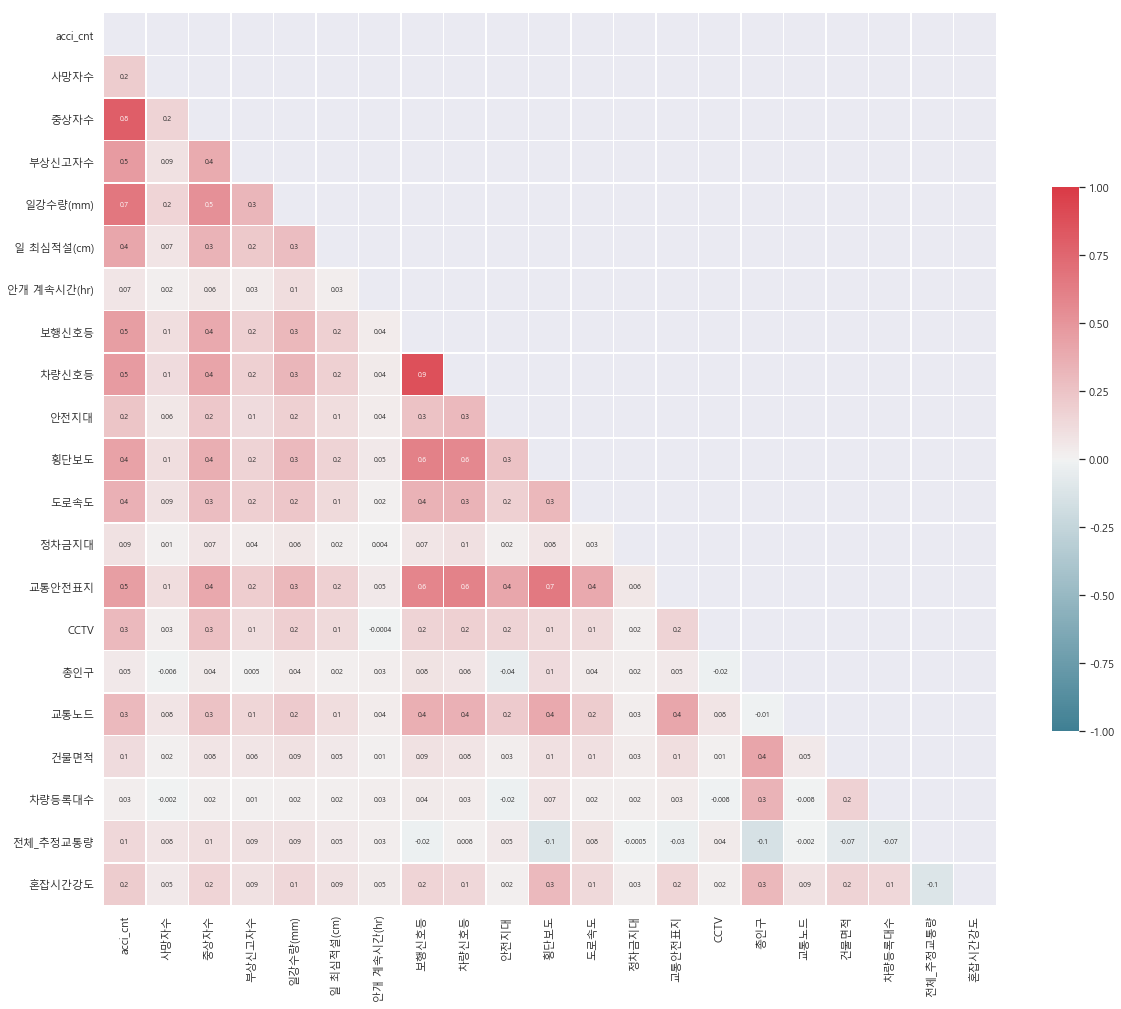

In [111]:
cor(dataset_gid)